Created for mirmos proposal

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import corner

from platon.fit_info import FitInfo
from platon.retriever import Retriever
from platon.constants import R_sun, R_jup, M_jup

from platon.transit_depth_calculator import TransitDepthCalculator
from platon.constants import M_jup, R_sun, R_jup
from platon.abundance_getter import AbundanceGetter


# All quantities in SI
Rs = 1.16 * R_sun     #Radius of star
Mp = 1.00 * M_jup     #Mass of planet
Rp = 1.00 * R_jup      #Radius of planet
T = 1200.              #Temperature of isothermal part of the atmosphere


from pylab import *

In [4]:
SPECTRAL_RES = 100

In [53]:
bins = []
l = 0.95
waves = [0.7]
bins = [[0.65, 0.75]]

while l < 2.45:
    dl = l/SPECTRAL_RES
    bins.append([l, l+dl])
    waves.append(l)
    l += dl
    
    
bins2 = []
l = 0.65
waves2 = [0.7]
bins2 = [[0.65, 0.75]]

while l < 2.45:
    dl = l/(SPECTRAL_RES*2)
    bins2.append([l, l+dl])
    waves2.append(l)
    l += dl
    
bins,bins2 = map(lambda x: np.array(x)/1e6, [bins, bins2])

Wavelengths that define out of band regions

In [54]:
oobs = [[0.8, 0.972], [1.124, 1.153], [1.352, 1.466], [1.807, 1.921]]

In [55]:
l = np.array(waves)
in_band = ((l>0.6) & (l<.8)) | \
            ((l>0.972) & (l < 1.124)) | \
            ((l > 1.153) & (l < 1.352)) |\
            ((l>1.466) & (l<1.807)) |\
            ((l>1.921) & (l<2.404))
oob = l>0

depth_calculator = TransitDepthCalculator()
depth_calculator.change_wavelength_bins(bins)
wavelengths, transit_depths = depth_calculator.compute_depths(
    Rs, Mp, Rp, T, CO_ratio=0.2, cloudtop_pressure=1e6, add_scattering=True,
    scattering_slope=4, scattering_factor=10)

model_calc = TransitDepthCalculator()
model_calc.change_wavelength_bins(bins2)
mw, md = model_calc.compute_depths(
    Rs, Mp, Rp, T, CO_ratio=0.2, cloudtop_pressure=1e6, add_scattering=True,
    scattering_slope=4, scattering_factor=10)


errors = np.zeros_like(transit_depths)
errors[:] = 30e-6

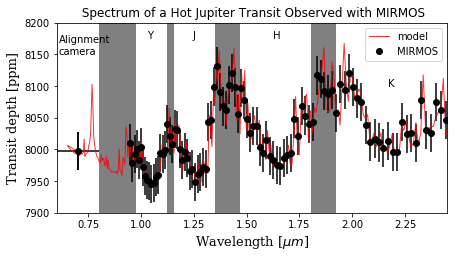

In [105]:

font = {'family' : 'serif',
      'weight' : 'normal',
      'size'   : 13}

    
#rc('font', font=font)
#rc('xtick', labelsize='large')
#rc('ytick', labelsize='large')

figure(figsize=(7, 3.5))
title(" Spectrum of a Hot Jupiter Transit Observed with MIRMOS")
plot(mw*1e6,md*1e6, color='red', alpha=0.8, lw=1)
plot(l,transit_depths*1e6, 'ok',)
errorbar(l, transit_depths*1e6, errors*1e6, fmt='k,')
errorbar(l[0], transit_depths[0]*1e6, yerr=errors[0]*1e6, xerr=0.1, fmt='k,')
for oob in oobs:
    fill_betweenx([0,10000], [oob[0], oob[0]], [oob[1], oob[1]], color='grey')

xlim(0.6,2.45)
v = 8175
text(0.61, v-25, "Alignment\ncamera")
text(oobs[0][1]*1.06, v, "Y")
text(oobs[1][1]*1.08, v, "J")
text(oobs[2][1]*1.11, v, "H")
text(oobs[3][1]*1.13, 8100, "K")
    
ylim(7900, 8200)

ax = gca()
ax.set_xlabel('Wavelength [$\mu m$]', fontdict=font)
ax.set_ylabel('Transit depth [ppm]', fontdict=font)
legend(["model", "MIRMOS"])


show()